# A005316

## Load

In [6]:
from math import e
import matplotlib.pyplot as pyplot
import numpy
import pandas

df = pandas.read_csv('A000682.csv', engine='pyarrow')
df = pandas.read_csv('A005316.csv', engine='pyarrow')
df['nLess_k'] = df['n'] - df['k']
df_odd = df[df['k'] % 2 != 0]
df_oddOdd = df_odd[df_odd['nLess_k'] % 2 != 0]
df_oddEven = df_odd[df_odd['nLess_k'] % 2 == 0]
df_even = df[df['k'] % 2 == 0]
df_evenOdd = df_even[df_even['nLess_k'] % 2 != 0]
df_evenEven = df_even[df_even['nLess_k'] % 2 == 0]

## Visualize

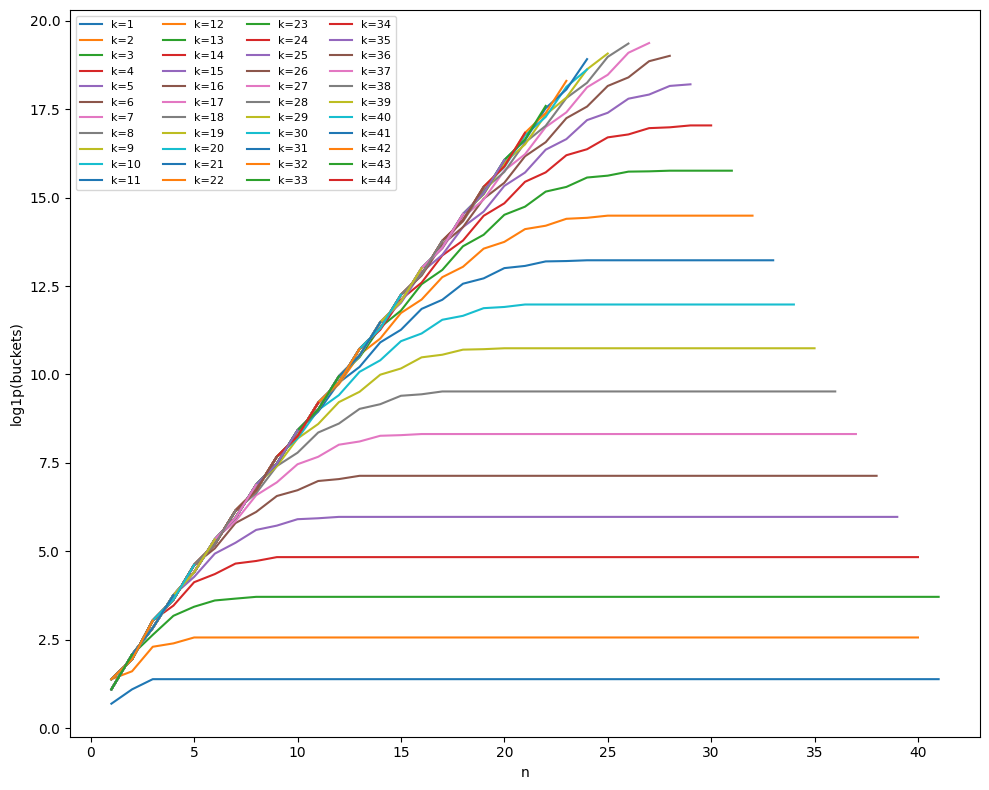

In [7]:
# pyright: basic

fig, axes = pyplot.subplots(1, 1, figsize=(10, 8), sharex=True)
for groupByValue, dataframeGroupBy in df.groupby('k'):
    axes.plot(dataframeGroupBy['nLess_k'], numpy.log1p(dataframeGroupBy['buckets']), label=f"k={groupByValue}")
axes.set_ylabel('log1p(buckets)')
axes.set_xlabel('n')
axes.legend(ncol=4, fontsize=8)
pyplot.tight_layout()
pyplot.show()

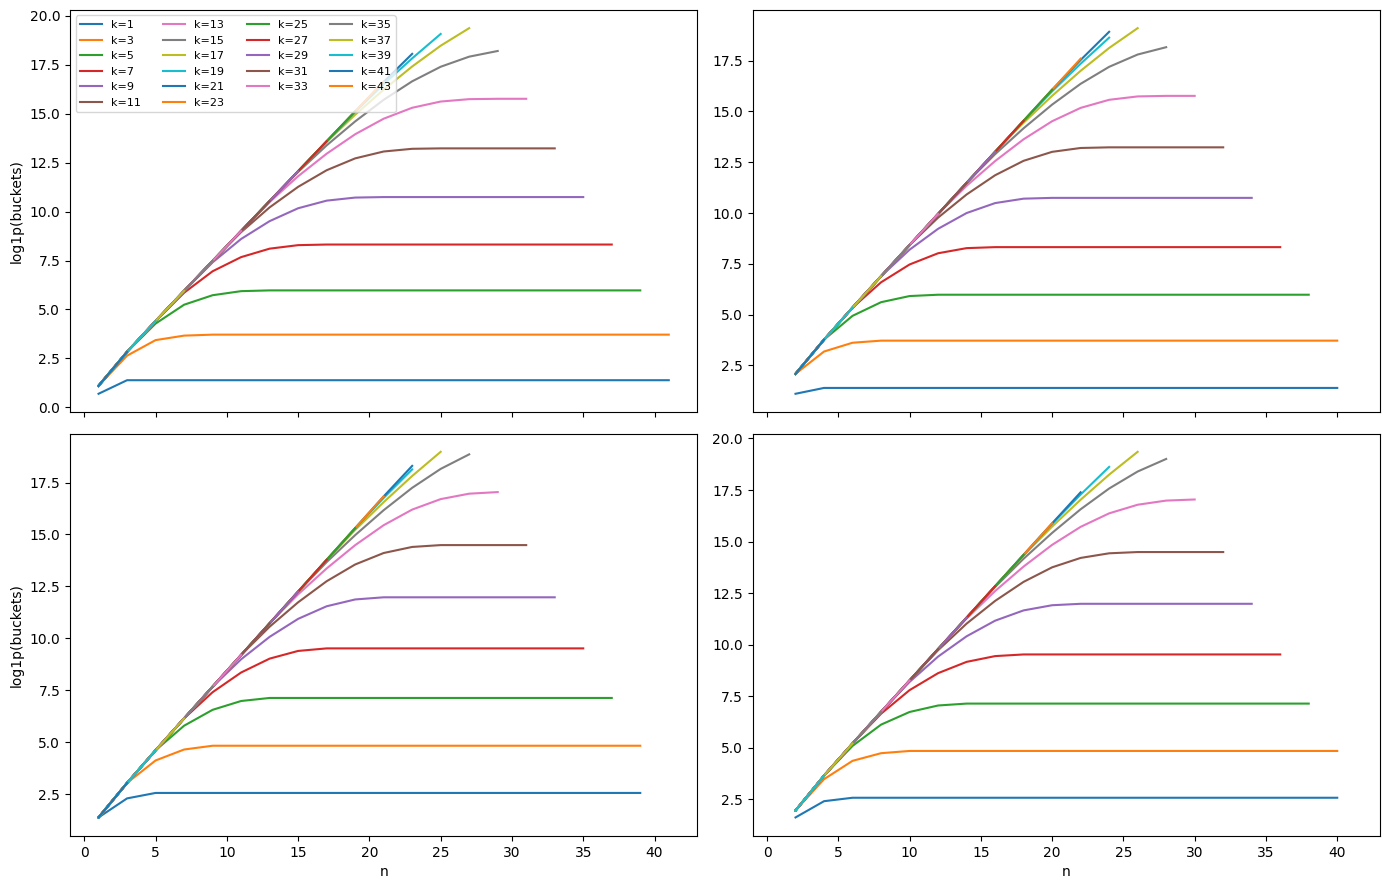

In [ ]:
# pyright: basic

fig, axes = pyplot.subplots(2, 2, figsize=(14, 9), sharex=True)
for groupByValue, dataframeGroupBy in df_oddOdd.groupby('k'):
    axes[0, 0].plot(dataframeGroupBy['nLess_k'], numpy.log1p(dataframeGroupBy['buckets']), label=f"k={groupByValue}")
for groupByValue, dataframeGroupBy in df_oddEven.groupby('k'):
    axes[0, 1].plot(dataframeGroupBy['nLess_k'], numpy.log1p(dataframeGroupBy['buckets']), label=f"k={groupByValue}")
for groupByValue, dataframeGroupBy in df_evenOdd.groupby('k'):
    axes[1, 0].plot(dataframeGroupBy['nLess_k'], numpy.log1p(dataframeGroupBy['buckets']), label=f"k={groupByValue}")
for groupByValue, dataframeGroupBy in df_evenEven.groupby('k'):
    axes[1, 1].plot(dataframeGroupBy['nLess_k'], numpy.log1p(dataframeGroupBy['buckets']), label=f"k={groupByValue}")
axes[0, 0].set_ylabel('log1p(buckets)')
axes[1, 0].set_ylabel('log1p(buckets)')
axes[1, 0].set_xlabel('n')
axes[1, 1].set_xlabel('n')
axes[0, 0].legend(ncol=4, fontsize=8)
pyplot.tight_layout()
pyplot.show()

## Observations

In [ ]:
from mapFolding.reference.A005316facts import bucketsIf_k_EVEN_by_nLess_k, bucketsIf_k_ODD_by_nLess_k
from pprint import pprint

pprint(bucketsIf_k_ODD_by_nLess_k)
pprint(bucketsIf_k_EVEN_by_nLess_k)


### Initial conditions
A005316, closed meanders, always starts with 1 curveLocations. A000682, in contrast, always starts with 2 *or more* curveLocations: `curveLocations = (n // 2) + 2`. This difference makes it easier to analyze A005316 than A000682.

Furthermore, there are only 2 initial values of the 1 curveLocations. If n is odd, curveLocations = 15. If n is even, curveLocations = 22. This simplicity is an advantage when analyzing A005316.

### Total non-unique buckets is a function of n and k

If we compare the total number of non-unique buckets (bucketsTotal) at the kth index across all values of n we can compute, we see three general trends. For a given k, as (n - k) increases:
1. bucketsTotal increases through a specific series of values.
2. At roughly k = n/2, bucketsTotal increases at an ever decreasing rate.
3. At roughly k = 2n, bucketsTotal stops increasing. 

### More facts
- For example, for n >= 4 and k=1, bucketsTotal=3. Always. (The maximums also apply to A000682: in this case, for n >= 5 and k=1, bucketsTotal=3.)
- From n-k>=1 to k<=(n+1)//2, the value of buckets has two series: for odd and even values of k. (Hopefully, the Python cell above has the two series.)
- In each series, it seems easier to describe the growth by dividing the series into odd and even values of n-k.
- If k is odd, bucketsTotal is maxed out at (k*2+2 <= n-k)
- If k is even, bucketsTotal is maxed out at (k*2+1 <= n-k)
- or k ≤ (n - 1 - (k % 2)) // 3

## Pivot the data

In [ ]:
# Pivot the data to create new columns for each value of 'k'
# Flatten the MultiIndex columns and append "_kX" to column names
# Reset the index to make 'nLess_k' a column and sort by 'nLess_k'
def pivotOn_nLess_k(dataframeTarget: pandas.DataFrame) -> pandas.DataFrame:
	pivoted = dataframeTarget.pivot(index='nLess_k', columns='k', values=['n', 'buckets'])
	pivoted.columns = [f"{col[0]}_k{col[1]}" for col in pivoted.columns]
	pivoted = pivoted.reset_index().sort_values(by='nLess_k', ascending=True)
	pivoted = pivoted.set_index('nLess_k').reset_index()
	return pivoted
df = pivotOn_nLess_k(df)
df_even = pivotOn_nLess_k(df_even)
df_odd = pivotOn_nLess_k(df_odd)

In [ ]:
bucketsTotalMaximumBy_kOfMatrix: dict[int, int] = {1:3, 2:12, 3:40, 4:125, 5:392, 6:1254, 7:4087, 8:13623, 9:46181, 10:159137, 11:555469, 12:1961369, 13:6991893, 14:25134208}

nLess_k: int = state.n - state.kOfMatrix
kIsOdd: bool = bool(state.kOfMatrix & 1)
nLess_kIsOdd: bool = bool(nLess_k & 1)
kIsEven: bool = not kIsOdd

bucketsTotalAtMaximum: bool = state.kOfMatrix <= ((state.n - 1 - (state.kOfMatrix % 2)) // 3)
bucketsTotalGrowsExponentially: bool = state.kOfMatrix > nLess_k
bucketsTotalGrowsLogarithmically: bool = state.kOfMatrix > ((state.n - (state.n % 3)) // 3)
